In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
from matplotlib.dates import YearLocator, DateFormatter
from statsmodels.tsa.seasonal import seasonal_decompose


# Importiere Datensätze

In [83]:
df_train = pd.read_csv("dataset/dengue_features_train.csv")
df_labels = pd.read_csv("dataset/dengue_labels_train.csv")

Bearbeite erstmal nur sj

In [84]:
df_sj_train = df_train.loc[df_train['city']=='sj']
df_sj_labels = df_labels.loc[df_labels['city']=='sj']

Gib den Tag anhand des Datums in week_start_date aus

In [85]:
df_sj_train['day'] = pd.to_datetime(df_sj_train['week_start_date']).dt.day_name()
df_sj_train.insert(df_sj_train.columns.get_loc("week_start_date"), "day", df_sj_train.pop("day"))
df_sj_train['week_start_date'] = pd.to_datetime(df_sj_train['week_start_date'], format='%Y-%m-%d')

C:\Users\rener\AppData\Local\Temp\ipykernel_4568\4236921693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sj_train['day'] = pd.to_datetime(df_sj_train['week_start_date']).dt.day_name()
C:\Users\rener\AppData\Local\Temp\ipykernel_4568\4236921693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sj_train['week_start_date'] = pd.to_datetime(df_sj_train['week_start_date'], format='%Y-%m-%d')


Laut dem letzten Kommentar von https://community.drivendata.org/t/week-53-in-features-data/2350/4
hat der Kommentator alle Wochen inkrementiert

Erstelle neuen Dataframe mit week_start_date aus dengue_features_train und total_cases aus dengue_labels_train - erstmal nur sj

In [86]:
df_sj_shortened = pd.DataFrame({
    'week_start_date': df_sj_train['week_start_date'],
    'total_cases': df_sj_labels['total_cases']
})

Erstelle Graph

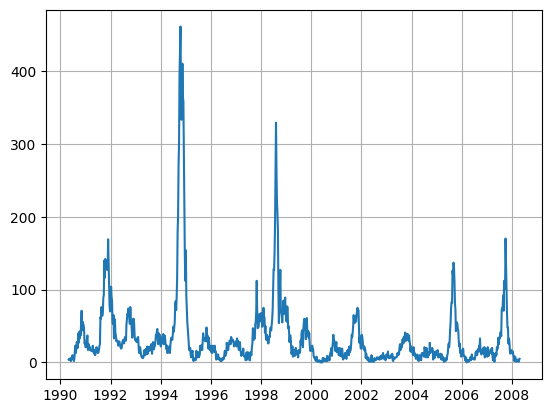

In [87]:
plt.plot(df_sj_shortened['week_start_date'],df_sj_shortened['total_cases'])
plt.grid()
plt.show()

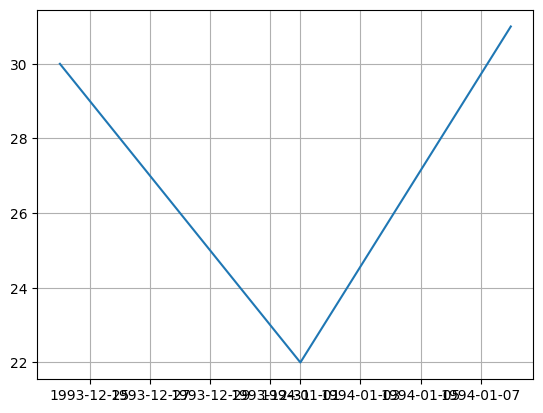

In [88]:
df_sj_period = df_sj_shortened[(df_sj_shortened['week_start_date'] >= '1993-12-24') & (df_sj_shortened['week_start_date'] <= '1994-01-08')]
plt.plot(df_sj_period['week_start_date'],df_sj_period['total_cases'])
plt.grid()
plt.show()

Erstelle neue Wochenanzahl nach den Originaldaten

In [90]:
df_sj_train['weekofyear_new'] = (df_sj_train.index % 52) + 1
print('success')

C:\Users\rener\AppData\Local\Temp\ipykernel_4568\1050663890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sj_train['weekofyear_new'] = (df_sj_train.index % 52) + 1
